<a href="https://colab.research.google.com/github/KrinalM/Krinalben_INFO5731_Spring2024/blob/main/Monpara_Krinalben_Assignment_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [ ]:
#importing libraries
import csv
import re
from collections import defaultdict

In [ ]:
# Function to preprocess text data
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    return text

In [ ]:
# Function to generate N-grams from a given text
def generate_ngrams(text, n):
    words = text.split()
    ngrams = []
    for i in range(len(words) - n + 1):
        ngram = ' '.join(words[i:i+n])
        ngrams.append(ngram)
    return ngrams

In [ ]:
# Function to count the frequency of N-grams
def count_ngrams(data, n):
    ngram_counts = defaultdict(int)
    for text in data:
        text = preprocess_text(text)
        ngrams = generate_ngrams(text, n)
        for ngram in ngrams:
            ngram_counts[ngram] += 1
    return ngram_counts

In [ ]:
# Function to calculate probabilities for bigrams
def calculate_bigram_probabilities(data):
    bigram_counts = defaultdict(int)
    unigram_counts = defaultdict(int)
    for text in data:
        text = preprocess_text(text)
        words = text.split()
        for i in range(len(words) - 1):
            bigram = ' '.join(words[i:i+2])
            bigram_counts[bigram] += 1
            unigram_counts[words[i]] += 1
    # Calculate probabilities
    probabilities = {}
    for bigram, count in bigram_counts.items():
        words = bigram.split()
        w2 = words[0]
        w1 = words[1]
        probability = count / unigram_counts[w2]
        probabilities[bigram] = probability
    return probabilities

In [ ]:
# Function to extract noun phrases from text
def extract_noun_phrases(text):
    # For simplicity, I just split the text into words and consider consecutive nouns as a noun phrase
    words = text.split()
    noun_phrases = []
    current_phrase = []
    for word in words:
        if word.isalpha() and word.islower():  # Filter out non-noun words
            current_phrase.append(word)
        else:
            if len(current_phrase) > 1:  # Considering consecutive nouns as a noun phrase
                noun_phrases.append(' '.join(current_phrase))
            current_phrase = []
    if len(current_phrase) > 1:  # Checking for the last phrase
        noun_phrases.append(' '.join(current_phrase))
    return noun_phrases

In [ ]:
# Function to calculate relative probabilities of noun phrases
def calculate_relative_probabilities(data):
    noun_phrase_frequencies = defaultdict(int)
    max_frequency = 0
    for text in data:
        text = preprocess_text(text)
        noun_phrases = extract_noun_phrases(text)
        for phrase in noun_phrases:
            noun_phrase_frequencies[phrase] += 1
            if noun_phrase_frequencies[phrase] > max_frequency:
                max_frequency = noun_phrase_frequencies[phrase]
# Calculate relative probabilities
    relative_probabilities = {}
    for text_index, text in enumerate(data):
        text = preprocess_text(text)
        noun_phrases = extract_noun_phrases(text)
        for phrase in noun_phrases:
            relative_probability = noun_phrase_frequencies[phrase] / max_frequency
            if text_index not in relative_probabilities:
                relative_probabilities[text_index] = {}
            relative_probabilities[text_index][phrase] = relative_probability
    return relative_probabilities

In [ ]:
# Load dataset from CSV file
dataset_file = '/content/df_cleaned_data.csv'
with open(dataset_file, 'r', encoding='utf-8') as file:
    reader = csv.DictReader(file)
    data = [row['lemmatized'] for row in reader]

In [ ]:
# (1) Count the frequency of all the N-grams (N=3)
ngram_counts = count_ngrams(data, 3)

In [ ]:
# (2) Calculate the probabilities for all the bigrams in the dataset
bigram_probabilities = calculate_bigram_probabilities(data)

In [ ]:
# (3) Extract all the noun phrases and calculate the relative probabilities
relative_probabilities = calculate_relative_probabilities(data)

In [ ]:
# Print out the results
print("N-gram Frequencies:")
for ngram, count in ngram_counts.items():
    print(f"{ngram}: {count}")

Streaming output truncated to the last 5000 lines.
present several challenge: 1
several challenge dspg: 1
challenge dspg particular: 1
dspg particular filtering: 1
particular filtering frequency: 1
filtering frequency analysis: 1
frequency analysis large: 1
data set review: 1
set review fundamental: 1
review fundamental concept: 1
fundamental concept dspg: 1
concept dspg including: 1
dspg including graph: 1
including graph signal: 1
graph signal graph: 1
signal graph filter: 1
graph filter graph: 1
filter graph fourier: 1
graph fourier transform: 1
fourier transform graph: 1
transform graph frequency: 1
graph frequency spectrum: 1
frequency spectrum ordering: 1
spectrum ordering compare: 1
ordering compare counterpart: 1
compare counterpart classical: 1
counterpart classical signal: 1
processing theory consider: 1
theory consider product: 1
consider product graph: 1
product graph graph: 1
graph graph model: 1
graph model help: 1
model help extend: 1
help extend application: 1
extend ap

In [ ]:
print("\nBigram Probabilities:")
for bigram, probability in bigram_probabilities.items():
    print(f"{bigram}: {probability}")

Streaming output truncated to the last 5000 lines.
critically important: 0.1111111111111111
direction governing: 0.022222222222222223
equation many: 0.045454545454545456
problem consideration: 0.0037593984962406013
consideration practitioner: 0.030303030303030304
practitioner various: 0.019230769230769232
field typically: 0.0024937655860349127
typically known: 0.034482758620689655
known thus: 0.03571428571428571
thus using: 0.020833333333333332
data alone: 0.0001789228842368939
alone help: 0.25
help derive: 0.009009009009009009
derive optimal: 0.1
optimal sense: 0.07142857142857142
sense best: 0.03225806451612903
best dynamical: 0.016666666666666666
system representation: 0.002347417840375587
representation given: 0.02
given application: 0.016666666666666666
application allows: 0.0030211480362537764
allows important: 0.02631578947368421
insight recently: 0.008403361344537815
recently developed: 0.034482758620689655
developed dynamic: 0.014285714285714285
dynamic mode: 0.035087719298245

In [ ]:
print("\nRelative Probabilities of Noun Phrases:")
for text_index, probabilities in relative_probabilities.items():
    print(f"Text {text_index + 1}:")
    for phrase, relative_probability in probabilities.items():
        print(f"{phrase}: {relative_probability}")


Relative Probabilities of Noun Phrases:
Text 1:
cambridge university press let u summarize finding random projection set r n onto mdimensional subspace approximately preserve geometry: 0.5
Text 2:
chatgpt conversational ai interface utilizes natural language processing machine learning algorithm taking world storm buzzword across many sector today given likely impact model data science perspective article seek provide overview potential opportunity challenge associated using chatgpt data science provide reader snapshot advantage stimulate interest use data science project paper discus chatgpt assist data scientist automating various aspect workflow including data cleaning preprocessing model training result interpretation also highlight chatgpt potential provide new insight improve decisionmaking process analyzing unstructured data examine advantage chatgpts architecture including ability finetuned wide range languagerelated task generate synthetic data limitation issue also addressed

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [ ]:
# importing libraries
import csv
import re
import math

In [ ]:
# Function to preprocess text data
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    return text

In [ ]:
# Function to calculate term frequency (TF)
def calculate_tf(document):
    term_frequency = {}
    words = document.split()
    total_words = len(words)
    for word in words:
        term_frequency[word] = term_frequency.get(word, 0) + 1
    for word, freq in term_frequency.items():
        term_frequency[word] = freq / total_words
    return term_frequency

In [ ]:
# Function to calculate inverse document frequency (IDF)
def calculate_idf(documents):
    document_frequency = {}
    num_documents = len(documents)
    for document in documents:
        words = set(document.split())
        for word in words:
            document_frequency[word] = document_frequency.get(word, 0) + 1
    inverse_document_frequency = {}
    for word, freq in document_frequency.items():
        inverse_document_frequency[word] = math.log(num_documents / (freq + 1))
    return inverse_document_frequency

In [ ]:
# Function to calculate TF-IDF weights for all documents
def calculate_tf_idf(documents):
    tf_idf_matrix = []
    idf = calculate_idf(documents)
    for document in documents:
        tf = calculate_tf(document)
        tf_idf = {}
        for word, tf_value in tf.items():
            tf_idf[word] = tf_value * idf[word]
        tf_idf_matrix.append(tf_idf)
    return tf_idf_matrix

In [ ]:
# Function to calculate cosine similarity between two documents
def cosine_similarity(doc_vector, query_vector):
    dot_product = sum(doc_vector[word] * query_vector.get(word, 0) for word in doc_vector)
    doc_magnitude = math.sqrt(sum(doc_vector[word] ** 2 for word in doc_vector))
    query_magnitude = math.sqrt(sum(query_vector[word] ** 2 for word in query_vector))
    if doc_magnitude == 0 or query_magnitude == 0:
        return 0  # Handle division by zero
    else:
        return dot_product / (doc_magnitude * query_magnitude)

In [ ]:
# Load dataset from CSV file
dataset_file = '/content/df_cleaned_data.csv'
with open(dataset_file, 'r', encoding='utf-8') as file:
    reader = csv.reader(file)
    documents = [preprocess_text(row[0]) for row in reader]

In [ ]:
# Design a query
query = "An Outstanding movie with a haunting performance and best character development"
query = preprocess_text(query)

In [ ]:
# Calculate TF-IDF matrix for all documents
tf_idf_matrix = calculate_tf_idf(documents)
tf_idf_matrix

[{'lemmatized': 6.214608098422191},
 {'cambridge': 0.30674782877012474,
  'university': 0.14694863344115675,
  'press': 0.25054777812132034,
  'let': 0.2943509648082242,
  'u': 0.15271512197902584,
  'summarize': 0.24126699564003334,
  'finding': 0.13502324802799612,
  'random': 0.1862448454162624,
  'projection': 0.2756580627737124,
  'set': 0.10010054472675313,
  'r': 0.17106188236072456,
  'n': 0.2371498860759377,
  'onto': 0.2943509648082242,
  'mdimensional': 0.30674782877012474,
  'subspace': 0.2943509648082242,
  'approximately': 0.2943509648082242,
  'preserve': 0.2457138127330076,
  'geometry': 0.2558427881104495},
 {'chatgpt': 0.29207981515545395,
  'conversational': 0.03245331279505043,
  'ai': 0.021322418020244812,
  'interface': 0.019589708923575318,
  'utilizes': 0.030846150379118694,
  'natural': 0.03125007167384163,
  'language': 0.046875107510762445,
  'processing': 0.026658845831654714,
  'machine': 0.011023918133248298,
  'learning': 0.008853325697450998,
  'algorith

In [ ]:
# Calculate IDF values for all documents
idf = calculate_idf(documents)

In [ ]:
# Calculate TF-IDF vector for the query
query_tf = calculate_tf(query)
query_tf_idf = {}
for word, tf_value in query_tf.items():
    if word in idf:  # Ensure IDF exists for the word
        query_tf_idf[word] = tf_value * idf[word]

In [ ]:
# Rank the documents using cosine similarity
document_scores = []
for doc_vector in tf_idf_matrix:
    similarity_score = cosine_similarity(doc_vector, query_tf_idf)
    document_scores.append(similarity_score)

In [ ]:
# Sort the documents based on similarity scores
sorted_documents = sorted(zip(range(1, len(documents)+1), document_scores), key=lambda x: x[1], reverse=True)

In [ ]:
# Print the ranked documents
print("Ranked Documents:")
for rank, (doc_index, score) in enumerate(sorted_documents, start=1):
    print(f"Rank {rank}: Document {doc_index} - Similarity Score: {score}")

Ranked Documents:
Rank 1: Document 354 - Similarity Score: 0.1528204824200994
Rank 2: Document 495 - Similarity Score: 0.10759839663932655
Rank 3: Document 682 - Similarity Score: 0.09978283313752091
Rank 4: Document 569 - Similarity Score: 0.08850135526569317
Rank 5: Document 280 - Similarity Score: 0.08126881327039298
Rank 6: Document 279 - Similarity Score: 0.08074831629168534
Rank 7: Document 602 - Similarity Score: 0.07521194529933128
Rank 8: Document 352 - Similarity Score: 0.05646027030975244
Rank 9: Document 243 - Similarity Score: 0.05444350792816373
Rank 10: Document 620 - Similarity Score: 0.05264997545730717
Rank 11: Document 545 - Similarity Score: 0.052535499300026094
Rank 12: Document 415 - Similarity Score: 0.04927164928050752
Rank 13: Document 29 - Similarity Score: 0.04074821957471942
Rank 14: Document 803 - Similarity Score: 0.04074821957471942
Rank 15: Document 200 - Similarity Score: 0.04034340313683458
Rank 16: Document 972 - Similarity Score: 0.04034340313683458


## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [ ]:
# importing libraries
import csv
import re
from gensim.models import Word2Vec
import matplotlib.pyplot as plt

In [ ]:
# Function to preprocess text data
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenize text
    tokens = text.split()
    return tokens

In [ ]:
# Load dataset from CSV file
dataset_file = '/content/df_cleaned_data.csv'
with open(dataset_file, 'r', encoding='utf-8') as file:
    reader = csv.reader(file)
    texts = [preprocess_text(row[0]) for row in reader]

In [ ]:
# Train Word2Vec model
model = Word2Vec(texts, vector_size=300, window=5, min_count=1, workers=4)
model

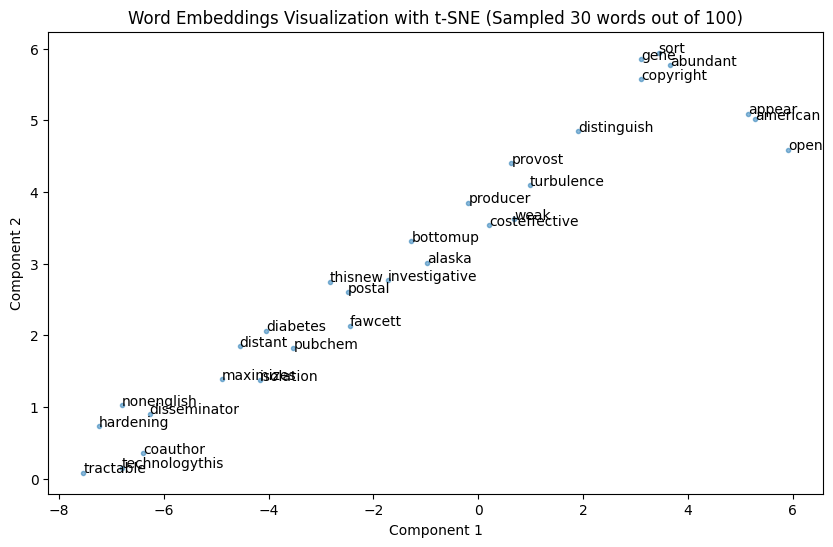

In [ ]:
import random

# Visualize the word embeddings with t-SNE and random sampling
def plot_word_embeddings_tsne_sampled(model, num_words=100, sample_size=30):
    # Get a random sample of words
    words = random.sample(list(model.wv.index_to_key), sample_size)
    word_vectors = model.wv[words]

    # Set perplexity based on the number of samples
    perplexity = min(30, sample_size // 3)  # Adjust 30 as needed, it's a heuristic value

    # Use t-SNE for dimensionality reduction
    from sklearn.manifold import TSNE
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    word_vectors_2d = tsne.fit_transform(word_vectors)

    # Plot word embeddings
    plt.figure(figsize=(10, 6))
    plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1], marker='.', alpha=0.5)
    for i, word in enumerate(words):
        plt.annotate(word, xy=(word_vectors_2d[i, 0], word_vectors_2d[i, 1]))
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.title(f'Word Embeddings Visualization with t-SNE (Sampled {sample_size} words out of {num_words})')
    plt.show()

# Plot word embeddings with t-SNE and random sampling
plot_word_embeddings_tsne_sampled(model)

Visualizing word embeddings can be challenging when dealing with a large number of words. In this code, I randomly sample a smaller subset of words from the vocabulary for visualization. I set the perplexity parameter based on the number of samples. I use a heuristic value (30) or one-third of the sample size, whichever is smaller. This should prevent the error and provide a meaningful visualization.

## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).
*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [ ]:
# The GitHub link of your final csv file

# https://github.com/KrinalM/Krinalben_INFO5731_Spring2024/blob/main/Reviews_SentimentAnalysis.xlsx



# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [ ]:
# Type your answer
'''
To be honest,
Gathering a diverse set of reviews and manually annotating them with sentiment labels was time-consuming and require careful attention to detail.
Writing code to implement NLP algorithms such as N-gram analysis, TF-IDF, and word embedding models from scratch was required a solid understanding of NLP concepts
and programming skills.
However, it was not too hard.
Approximately, I provided 4-5 days to complete this assignment.

'''

'\nTo be honest,\nGathering a diverse set of reviews and manually annotating them with sentiment labels was time-consuming and require careful attention to detail.\nWriting code to implement NLP algorithms such as N-gram analysis, TF-IDF, and word embedding models from scratch was required a solid understanding of NLP concepts\nand programming skills.\nHowever, it was not too hard.\nApproximately, I provided 4-5 days to complete this assignment.\n\n'